In [5]:
from netCDF4 import Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
print(os.getcwd())

/home/VM-Nicolas-Lafon/Danube


In [6]:
 ncfile = Dataset('ResDanube4DVar/-exp1/model_Debit-epoch=367-val_loss=0.01_res.nc',"r")

In [7]:
print(ncfile)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): Stations(31), time(506), S(31)
    variables(dimensions): int64 stations(Stations), <class 'str'> Time(time), float64 debit_gt(time, Stations), float64 debit_obs(time, Stations), float64 debit_rec(time, Stations), int64 S(S), int64 time(time)
    groups: 


In [8]:
debit_obs = ncfile.variables['debit_obs'][:]
debit_GT = ncfile.variables['debit_gt'][:]
debit_rec = ncfile.variables['debit_rec'][:]

In [9]:
print(debit_obs.shape)
print(debit_GT.shape)
print(debit_rec[0])

(506, 31)
(506, 31)
[731.4103534  403.37066928 307.72832484 288.39514119 229.71402923
 205.53152358 184.73203204 145.85429074 107.48811018  81.13557651
  16.32211944   7.19034507 298.8681962  103.12340706  91.13084384
  22.38444679  21.87274524  13.13097162   8.38297325  50.04048475
  38.03930854  31.27560094  39.00947477  29.58343307  21.42135098
  17.58658144  14.30021227  13.30919636  10.0811694   95.6950469
 109.52656596]


In [10]:
M = np.mean(((debit_GT-debit_rec)**2),0)
M2 = np.mean(((debit_GT-debit_rec)**2)/(debit_GT**2),0)
M3 = np.mean((abs(debit_GT-debit_rec))/(debit_GT),0)
print(M2)
print(M3)

print(M[1],M[3],M[15],M[24])


[4.931416387786338e-05 0.0031636167510498622 7.821161502744157e-05
 0.004213404982335933 3.910569499020922e-05 4.7892479453707084e-05
 4.4936255477090897e-05 5.834326605094211e-05 5.901347472927371e-05
 8.294711476405906e-05 0.0002501670182310019 0.0007824692974793688
 0.00012645164333081248 5.313392750957359e-05 5.436400538928493e-05
 0.04755125098445033 0.0005110656860367652 0.00025401835262987057
 0.0009361129426510483 0.0001617758431169353 0.00027920791645102126
 0.0015054883358313006 0.0003400467311717157 0.000498534930388227
 0.019556013447562623 0.00018543345422151165 0.0003228013455890385
 0.0006005764706857098 0.001276689506031613 0.0009457878483435347
 0.0018371993938497268]
[0.00465106789939975 0.04164110597611227 0.006256046199067778
 0.04626498692162972 0.004326124106521509 0.004505776639027923
 0.00433703121214826 0.005024783801898328 0.005069154280962383
 0.006168264460857009 0.010502678164056017 0.015841211669197105
 0.007401704695754799 0.004881359146958591 0.005042093

663.2075098814229


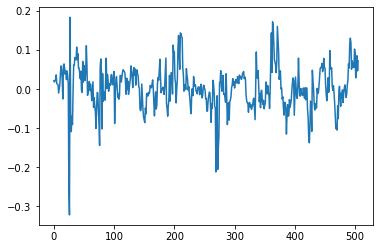

In [11]:
s=1
plt.figure(0)
print(np.mean(debit_GT[:,s]))
plt.plot((debit_GT-debit_rec)[:,s]/663.207)